In [1]:
using Plots
using JLD
using Statistics

In [19]:
#Mean over all but one attribute
function meanOverAllButOneIndex(index::Integer, arr::AbstractArray)
    averageOverIndices = (setdiff(2:length(size(arr)), index)...,)
    meanArray = mean(arr, dims=averageOverIndices)
    reshaped = dropdims(meanArray, dims=averageOverIndices)
    return reshaped
end

meanOverAllButOneIndex (generic function with 1 method)

In [33]:
numClusters

7-element Vector{Int64}:
   2
   4
   8
  16
  32
  64
 128

# Two Sided Results

In [18]:
run1 = load("Data/FactorialSimulationTwoSided1.jld")["results"]
run2 = load("Data/FactorialSimulationTwoSided2.jld")["results"]
run3 = load("Data/FactorialSimulationTwoSided3.jld")["results"]
run4 = load("Data/FactorialSimulationTwoSided4.jld")["results"]
run5 = load("Data/FactorialSimulationTwoSided5.jld")["results"]

results = cat(run1, run2, run3, run4, run5, dims=7)

print(size(results))

#Indexes are (Model, NumClusters, NumObservations, SizeImbalance, Precision, AmountRandomized, Run)

(4, 7, 7, 4, 5, 5, 5)

In [35]:
numClusters      = meanOverAllButOneIndex(2, results)
numObservations  = meanOverAllButOneIndex(3, results)
sizeImbalance    = meanOverAllButOneIndex(4, results)
precision        = meanOverAllButOneIndex(5, results)
amountRandomized = meanOverAllButOneIndex(6, results)

4×5 Matrix{Float64}:
 0.670986  0.406479    0.198351   0.0479285   0.0595363
 0.493814  0.0772627  -0.253994  -0.494117   -0.611128
 0.469603  0.0381243  -0.299766  -0.536571   -0.679188
 0.652587  0.392751    0.202874   0.0766882   7.1723e-5

# Two Side Plots

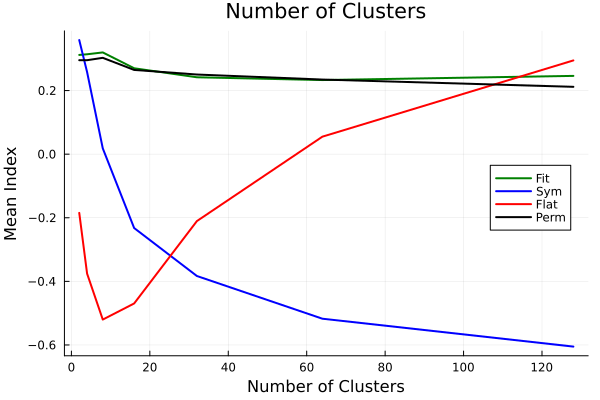

In [38]:
numClustersList = [2, 4, 8, 16, 32, 64, 128]
plot(numClustersList, numClusters[1, :],  label="Fit", linewidth=2, linecolor=:green, legend=:right)
plot!(numClustersList, numClusters[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(numClustersList, numClusters[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(numClustersList, numClusters[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Number of Clusters")
xlabel!("Number of Clusters")
ylabel!("Mean Index")
#savefig("FactorialTwoSideNumberClusters.png")

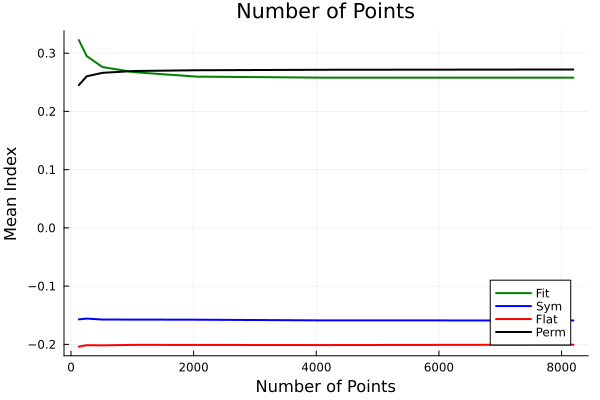

In [39]:
numObservationsList = [128, 256, 512, 1024, 2048, 4096, 8192]
plot(numObservationsList, numObservations[1, :], label="Fit", linewidth=2, linecolor=:green, legend=:bottomright)
plot!(numObservationsList, numObservations[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(numObservationsList, numObservations[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(numObservationsList, numObservations[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Number of Points")
xlabel!("Number of Points")
ylabel!("Mean Index")
#savefig("FactorialTwoSideNumberPoints.png")

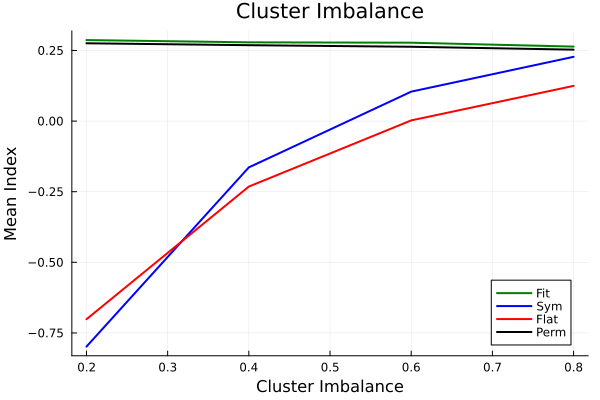

In [40]:
sizeImbalanceList = [0.8, 0.6, 0.4, 0.2]
plot(sizeImbalanceList, sizeImbalance[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(sizeImbalanceList, sizeImbalance[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(sizeImbalanceList, sizeImbalance[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(sizeImbalanceList, sizeImbalance[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Cluster Imbalance")
xlabel!("Cluster Imbalance")
ylabel!("Mean Index")
#savefig("FactorialTwoSideClusterImbalance.png")

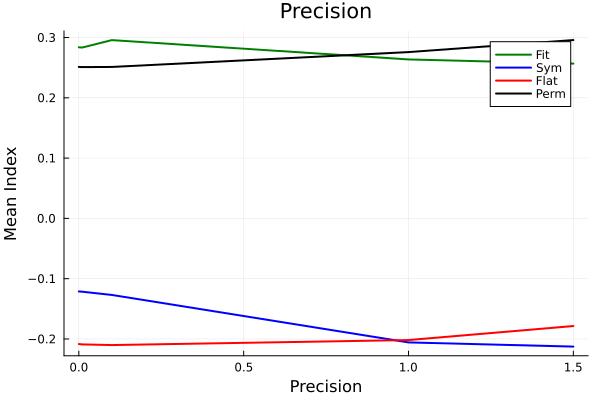

In [41]:
precisionList = [0, 0.01, 0.1,  1, 1.5]
plot(precisionList, precision[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(precisionList, precision[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(precisionList, precision[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(precisionList, precision[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Precision")
xlabel!("Precision")
ylabel!("Mean Index")
#savefig("FactorialTwoSidePrecision.png")

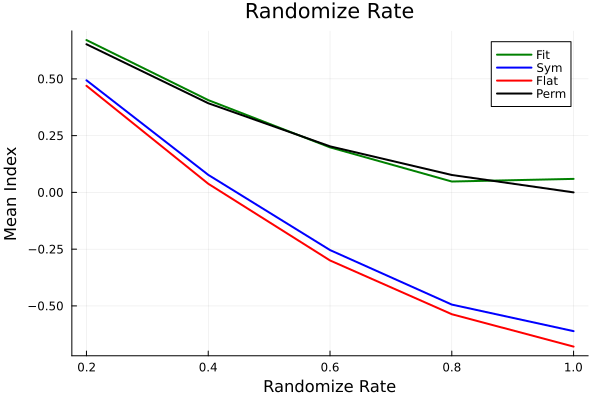

In [42]:
amountRandomizedList = [0.2, 0.4, 0.6, 0.8, 1.0]
plot(amountRandomizedList, amountRandomized[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(amountRandomizedList, amountRandomized[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(amountRandomizedList, amountRandomized[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(amountRandomizedList, amountRandomized[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Randomize Rate")
xlabel!("Randomize Rate")
ylabel!("Mean Index")
#savefig("FactorialTwoSideRandomizeRate.png")

### Maximum Fit / Perm Disagreement

In [45]:
diff = [
    abs.(numClusters[1, :] - numClusters[4, :]),
    abs.(numObservations[1, :] - numObservations[4, :]),
    abs.(sizeImbalance[1, :] - sizeImbalance[4, :]),
    abs.(precision[1, :] - precision[4, :]),
    abs.(amountRandomized[1, :] - amountRandomized[4, :])
]
maximum(maximum(diff))

0.07738823037243239

# One Sided Comparison

In [47]:
run1 = load("Data/FactorialSimulationOneSided1.jld")["results"]
run2 = load("Data/FactorialSimulationOneSided2.jld")["results"]
run3 = load("Data/FactorialSimulationOneSided3.jld")["results"]
run4 = load("Data/FactorialSimulationOneSided4.jld")["results"]
run5 = load("Data/FactorialSimulationOneSided5.jld")["results"]

results = cat(run1, run2, run3, run4, run5, dims=7)

print(size(results))

#Indexes are (Model, NumClusters, NumObservations, SizeImbalance, Precision, AmountRandomized, Run)

(4, 7, 7, 4, 5, 5, 5)

In [48]:
numClusters      = meanOverAllButOneIndex(2, results)
numObservations  = meanOverAllButOneIndex(3, results)
sizeImbalance    = meanOverAllButOneIndex(4, results)
precision        = meanOverAllButOneIndex(5, results)
amountRandomized = meanOverAllButOneIndex(6, results)

4×5 Matrix{Float64}:
 0.664221  0.389147  0.172172    0.0128502   0.0541336
 0.623809  0.313405  0.0674891  -0.11171    -0.179784
 0.851272  0.728754  0.632859    0.563238    0.519095
 0.644979  0.37222   0.176619    0.0549597   4.59533e-5

### One Side Plots

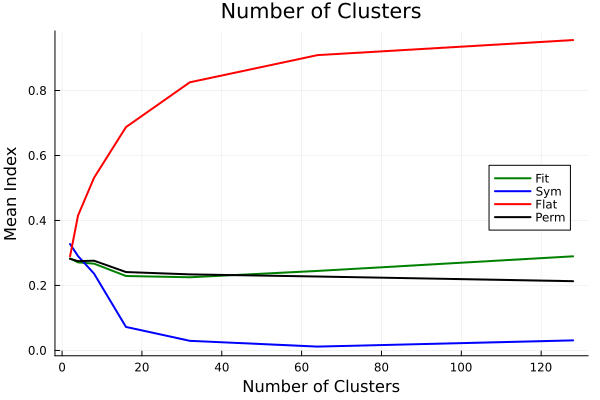

In [49]:
numClustersList = [2, 4, 8, 16, 32, 64, 128]
plot(numClustersList, numClusters[1, :],  label="Fit", linewidth=2, linecolor=:green, legend=:right)
plot!(numClustersList, numClusters[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(numClustersList, numClusters[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(numClustersList, numClusters[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Number of Clusters")
xlabel!("Number of Clusters")
ylabel!("Mean Index")
#savefig("FactorialOneSideNumberClusters.png")

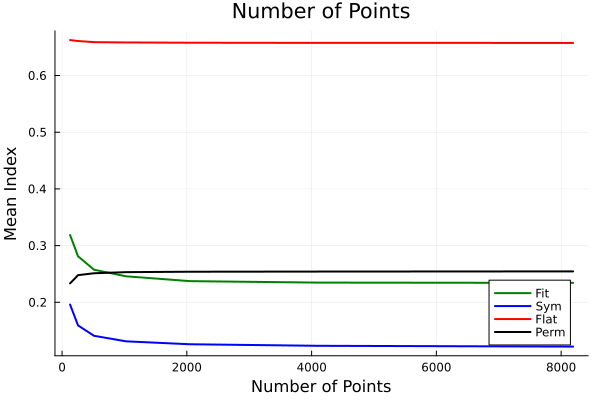

In [50]:
numObservationsList = [128, 256, 512, 1024, 2048, 4096, 8192]
plot(numObservationsList, numObservations[1, :], label="Fit", linewidth=2, linecolor=:green, legend=:bottomright)
plot!(numObservationsList, numObservations[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(numObservationsList, numObservations[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(numObservationsList, numObservations[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Number of Points")
xlabel!("Number of Points")
ylabel!("Mean Index")
#savefig("FactorialOneSideNumberPoints.png")

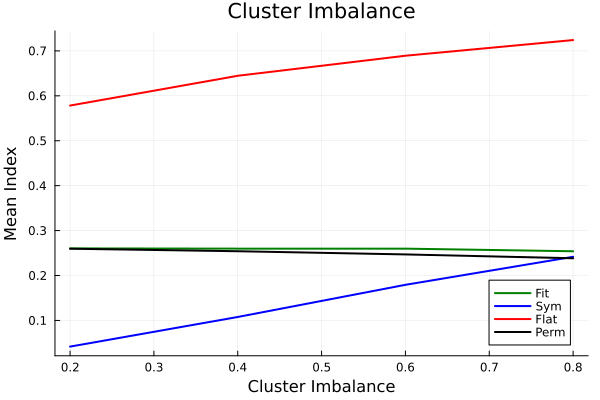

In [51]:
sizeImbalanceList = [0.8, 0.6, 0.4, 0.2]
plot(sizeImbalanceList, sizeImbalance[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(sizeImbalanceList, sizeImbalance[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(sizeImbalanceList, sizeImbalance[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(sizeImbalanceList, sizeImbalance[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Cluster Imbalance")
xlabel!("Cluster Imbalance")
ylabel!("Mean Index")
#savefig("FactorialOneSideClusterImbalance.png")

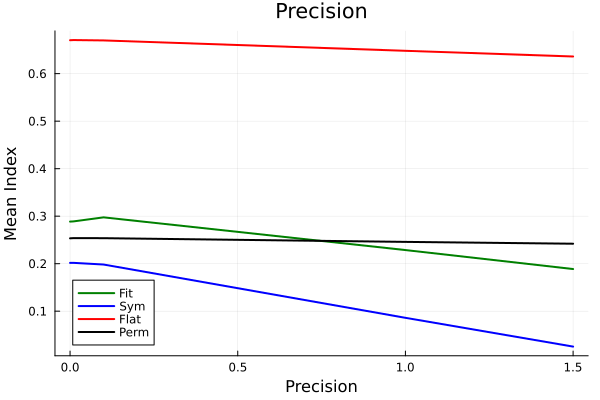

In [52]:
precisionList = [0, 0.01, 0.1,  1, 1.5]
plot(precisionList, precision[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(precisionList, precision[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(precisionList, precision[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(precisionList, precision[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Precision")
xlabel!("Precision")
ylabel!("Mean Index")
#savefig("FactorialOneSidePrecision.png")

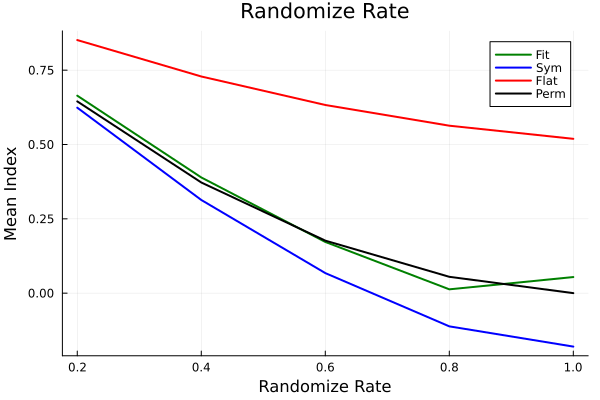

In [53]:
amountRandomizedList = [0.2, 0.4, 0.6, 0.8, 1.0]
plot(amountRandomizedList, amountRandomized[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(amountRandomizedList, amountRandomized[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(amountRandomizedList, amountRandomized[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(amountRandomizedList, amountRandomized[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Randomize Rate")
xlabel!("Randomize Rate")
ylabel!("Mean Index")
#savefig("FactorialOneSideRandomizeRate.png")

### Maximum Fit/Perm disagreement

In [54]:
diff = [
    abs.(numClusters[1, :] - numClusters[4, :]),
    abs.(numObservations[1, :] - numObservations[4, :]),
    abs.(sizeImbalance[1, :] - sizeImbalance[4, :]),
    abs.(precision[1, :] - precision[4, :]),
    abs.(amountRandomized[1, :] - amountRandomized[4, :])
]
maximum(maximum(diff))

0.08539841843249654